In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive')

import os
os.chdir('/content/gdrive/My Drive') 

Mounted at /content/gdrive


Source code berikut berfungsi untuk menghubungkan antara google colab dengan gdrive akun milik Anda. Diharapkan di gdrive anda sudah terdapat folder Dataset. Source code berikut juga mengubah working path anda ke path "/content/gdrive/My Drive", karena google colab ini menggunakan linux sebagai os-nya maka command-command linux dapat digunakan disini.

In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

function yang akan digunakan untuk mengecek path tree dari sebuah folder.
Source: 

In [ ]:
from imutils import paths

imgpths = paths.list_images('Dataset')
list_files('Dataset')

Dataset/
    Tenebrio/
        Tenebrio1.jpg
        Tenebrio2.jpg
        Tenebrio3.jpg
        Tenebrio4.jpg
        Tenebrio5.jpg
        Tenebrio6.jpg
        Tenebrio7.jpg
        Tenebrio8.jpg
        Tenebrio9.jpg
        Tenebrio10.jpg
        Tenebrio11.jpg
        Tenebrio12.jpg
        Tenebrio13.jpg
        Tenebrio14.jpg
        Tenebrio15.jpg
        Tenebrio16.jpg
        Tenebrio17.jpg
        Tenebrio18.jpg
        Tenebrio19.jpg
        Tenebrio20.jpg
        Tenebrio21.jpg
        Tenebrio22.jpg
        Tenebrio23.jpg
        Tenebrio24.jpg
        Tenebrio25.jpg
        Tenebrio26.jpg
        Tenebrio27.jpg
        Tenebrio28.jpg
        Tenebrio29.jpg
        Tenebrio30.jpg
        Tenebrio31.jpg
        Tenebrio32.jpg
        Tenebrio33.jpg
        Tenebrio34.jpg
        Tenebrio35.jpg
        Tenebrio36.jpg
        Tenebrio37.jpg
        Tenebrio38.jpg
        Tenebrio39.jpg
        Tenebrio40.jpg
        Tenebrio41.jpg
        Tenebrio42.jpg
        Tenebrio43.j

Simpan nama folder dari satu dir yang sama dengan working path. Contoh pada source code di atas, daataset disimpan pada folder Dataset. *imgpths* menyimpan nama folder, sedangkan untuk code berikutnya berfungsi menggunakan function *list_files* dari code sebelumnya dengan input nama folder letak disimpannya dataset.

Dataset
Tenebrio


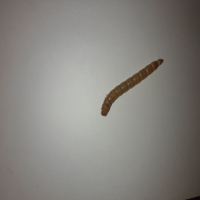

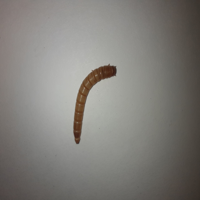

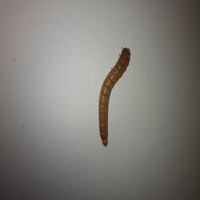

Zophobas


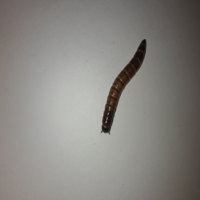

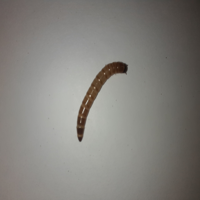

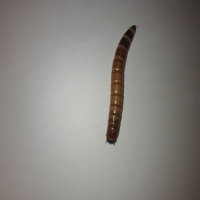

In [ ]:
from PIL import Image
import os
from IPython.display import display 
from imutils import paths

imgpths = paths.list_images('Dataset')
print('Dataset')
count=0
kelas_seb = None
for dirimg in imgpths:
  kelas = dirimg.split(os.path.sep) [1]
  if kelas_seb is None:
    print(kelas)
    kelas_seb = kelas
  if kelas_seb != kelas:
    print(kelas)
    count=0
    kelas_seb = kelas
  a = Image.open(dirimg)
 
  count=count+1
  if count <= 3:
    im =a.resize((200,200))
    display(im)
  else:
    continue


Source code berikut berfungsi untuk mengambil nama folder yang ada pada folder Dataset dan mengambil setiap nama file gambar, kemudian untuk setiap folder atau kelas yang ada di Dataset akan ditampilkan gambar yang ada di subfolder berikut masing-masing 3 gambar.

In [ ]:
imgpths = paths.list_images('Dataset')
count=1
kelas_seb = None
for dirimg in imgpths:
  dir = dirimg.split(os.path.sep)[0]
  kelas = dirimg.split(os.path.sep)[1]
  nama = dirimg.split(os.path.sep)[2]
  if kelas_seb is None:
    kelas_seb = kelas
  if kelas_seb != kelas:
    count=1
    kelas_seb = kelas
  pat = os.path.join(dir,kelas,nama)
  nama_baru = kelas+str(count)+'.jpg'
  os.rename(pat,os.path.join(dir,kelas,nama_baru))
  count=count+1


Source code berikut berfungssi untuk mengubah nama file dari setiap gambar yang berada dalam folder kelas menjadi berformat "(nama kelas)1.jpg", "(nama kelas)2.jpg", dst.

In [ ]:
def unique(list1):
 
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

Sebuah function untuk mendapatkan nilai-nilai unik dari sebuah list, menjadi list baru yang berisi nilai-nilai yang tidak berulang.

In [ ]:
import numpy as np

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['Tenebrio', 'Zophobas']

Source code berikut berfungsi untuk mengumpulkan semua gambar dataset dalam satu variabel dan melakukan rescale serta normalisasi dengan membagi nilai warna dengan 255. Kemudian menyimpan label dari setiap gambar sesuai dengan posisi gambar berada di subfolder kelas mana. Lalu, mendapatkan nilai unique dari label ini sehingga dapat mengetahui ada berapa kelas dalam dataset tersebut.

In [ ]:
def image_to_feature_vector(image, size=(224, 224)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [ ]:
#import numpy as np

def plot_confusion_matrix(cm,
                          target_names=kelas_asli,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
import numpy as np
import cv2

kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224)))
  nil_pix = image_to_feature_vector(gmbrz)

  kumpl_gmbr.append(nil_pix)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)


In [ ]:
kumpl_lbl

['Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',
 'Tenebrio',

In [ ]:
import numpy as np
from PIL import Image


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['Tenebrio', 'Zophobas']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
kumpl_lbl = lb.fit_transform(kumpl_lbl)
if len(kelas_asli)==2:
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl))

VGG19

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/25
18/18 [==============================] - 23s 267ms/step - loss: 0.7483 - accuracy: 0.5885
Epoch 2/25
18/18 [==============================] - 5s 267ms/step - loss: 0.4822 - accuracy: 0.8003
Epoch 3/25
18/18 [==============================] - 5s 267ms/step - loss: 0.3709 - accuracy: 0.8854
Epoch 4/25
18/18 [==============================] - 5s 268ms/step - loss: 0.2879 - accuracy: 0.9132
Epoch 5/25
18/18 [==============================] - 5s 269ms/step - loss: 0.2431 - accuracy: 0.9201
Epoch 6/25
18/18 [==============================] - 5s 270ms/step - loss: 0.2043 - accuracy: 0.9358
Epoch 7/25
18/18 [==============================] - 5s 270ms/step - loss: 0.1822 - accuracy: 0.9340
Epoch 8/25
18/18 [==============================] - 5s 270ms/step - loss: 0.1871 - accuracy: 0.9253
Epoch 9/25
18/18 [==============================] - 5s 271ms/step - loss: 0.2249 - accuracy: 0.8993
Epoch 10/25
18/18 [===============

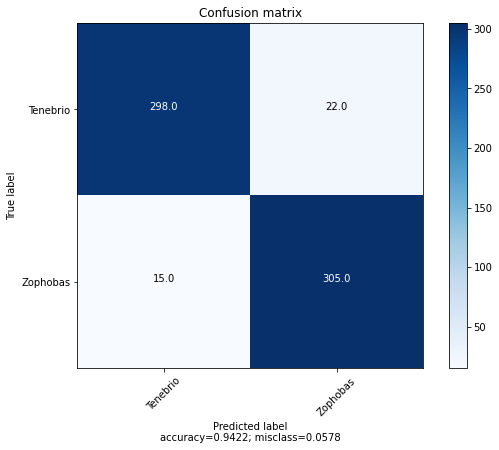

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_27 (Dense)            (None, 50)                1254450   
                                                                 
 dense_28 (Dense)            (None, 20)                1020      
                                                                 
 dense_29 (Dense)            (None, 2)                 42        
                                                                 
Total params: 21,279,896
Trainable params: 1,255,512
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.losses import sparse_categorical_crossentropy

#SF = KFold(n_splits=10, shuffle=True)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
# kumpl_lbl = kumpl_lbl.reshape(kumpl_lbl.shape[0], 1)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

num_label=len(kelas_asli)
all_cm=np.zeros((num_label,num_label))

for latih_idx, uji_idx in skf.split(kumpl_gmbr, np.argmax(kumpl_lbl, axis=1)):
    vgg = VGG19(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
    vgg.trainable = False 
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

    vgg_19 = models.Sequential([
        vgg,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])

    vgg_19.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    h = vgg_19.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 25, batch_size = 32)
    scores = vgg_19.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {vgg_19.metrics_names[0]} of {scores[0]}; {vgg_19.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

    #for cm only
    from sklearn.metrics import confusion_matrix
    predict = vgg_19.predict(kumpl_gmbr[uji_idx])
    cm = confusion_matrix(np.argmax(kumpl_lbl[uji_idx], axis=1), np.argmax(predict, axis=1))
    all_cm=all_cm+cm

print('------------------------------------------------------------------------')
print('VGG19')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average for each Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
plot_confusion_matrix(all_cm,normalize=False)
vgg_19.summary()

Inception V3

87924736/87910968 [==============================] - 2s 0us/step
Epoch 1/25
18/18 [==============================] - 10s 165ms/step - loss: 1.8373 - accuracy: 0.7240
Epoch 2/25
18/18 [==============================] - 3s 163ms/step - loss: 0.1413 - accuracy: 0.9410
Epoch 3/25
18/18 [==============================] - 3s 163ms/step - loss: 0.0859 - accuracy: 0.9722
Epoch 4/25
18/18 [==============================] - 3s 163ms/step - loss: 0.0421 - accuracy: 0.9931
Epoch 5/25
18/18 [==============================] - 3s 163ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 6/25
18/18 [==============================] - 3s 163ms/step - loss: 0.0145 - accuracy: 1.0000
Epoch 7/25
18/18 [==============================] - 3s 163ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 8/25
18/18 [==============================] - 3s 162ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 9/25
18/18 [==============================] - 3s 162ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 10/25
18/18 [===============

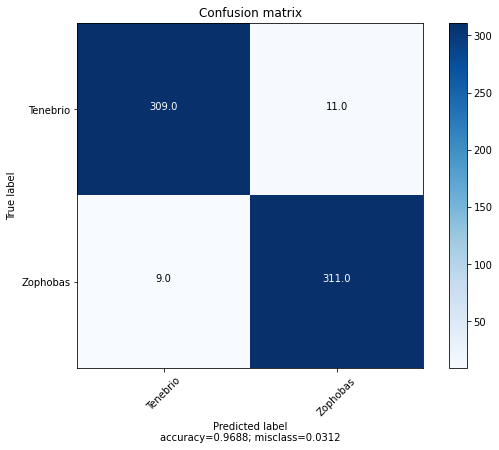

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_19 (Flatten)        (None, 51200)             0         
                                                                 
 dense_57 (Dense)            (None, 50)                2560050   
                                                                 
 dense_58 (Dense)            (None, 20)                1020      
                                                                 
 dense_59 (Dense)            (None, 2)                 42        
                                                                 
Total params: 24,363,896
Trainable params: 2,561,112
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
import numpy as np

from keras.applications.inception_v3 import InceptionV3



from tensorflow.keras.losses import sparse_categorical_crossentropy

#SF = KFold(n_splits=10, shuffle=True)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold = []
kumpl_lbl = np.array(kumpl_lbl)
kumpl_gmbr = np.array(kumpl_gmbr)
fold_no = 1

num_label=len(kelas_asli)
all_cm=np.zeros((num_label,num_label))

for latih_idx, uji_idx in skf.split(kumpl_gmbr, np.argmax(kumpl_lbl, axis=1)):
    incv3 = InceptionV3(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
    incv3.trainable = False 
    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

    incv3_new = models.Sequential([
        incv3,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])

    incv3_new.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )

    h = incv3_new.fit(kumpl_gmbr[latih_idx], kumpl_lbl[latih_idx,:], epochs = 25, batch_size = 32)
    scores = incv3_new.evaluate(kumpl_gmbr[uji_idx], kumpl_lbl[uji_idx], verbose=0)
    print(f'Score for fold {fold_no}: {incv3_new.metrics_names[0]} of {scores[0]}; {incv3_new.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

    #for cm only
    from sklearn.metrics import confusion_matrix
    predict = incv3_new.predict(kumpl_gmbr[uji_idx])
    cm = confusion_matrix(np.argmax(kumpl_lbl[uji_idx], axis=1), np.argmax(predict, axis=1))
    all_cm=all_cm+cm

print('------------------------------------------------------------------------')
print('InceptionV3')

print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average for each Fold:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

plot_confusion_matrix(all_cm,normalize=False)
incv3_new.summary()